<a href="https://colab.research.google.com/github/NithyaConnect/ds-phython/blob/main/k_means_clustering3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering with 3 variables






Wholesale customer data ,customers grouped based on their buying in "Fresh","milk" and "Grocery".

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
path="/content/drive/MyDrive/kmeans udemy/wholesale.csv" 
data=pd.read_csv(path)
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
X = data.iloc[:, [2,3,4]].values


In [ ]:
df=data[["Fresh","Milk","Grocery"]].copy()
df


,Fresh,Milk,Grocery
0,12669,9656,7561
1,7057,9810,9568
2,6353,8808,7684
3,13265,1196,4221
4,22615,5410,7198
...,...,...,...
435,29703,12051,16027
436,39228,1431,764
437,14531,15488,30243
438,10290,1981,2232


## Using the elbow method to find the optimal number of clusters

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i,init='k-means++')
    KM.fit(X)
    wss.append(KM.inertia_)
wss


[133778664304.05914,
 90498255189.62437,
 62465134559.18129,
 49487773439.99068,
 37289138409.84497,
 32041097547.5896,
 27145597496.07483,
 23746531052.298378,
 20635780861.145138,
 19060667590.57202]

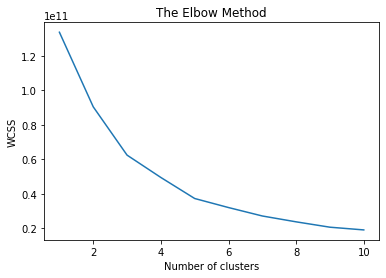

In [ ]:
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k_means = KMeans(n_clusters = 5,init='k-means++')
k_means.fit(X)
labels = k_means.labels_


In [ ]:
df["cluster"]=labels


In [ ]:
df["cluster"].value_counts()

0    233
3    109
4     68
1     22
2      8
Name: cluster, dtype: int64

In [ ]:
df.tail(10)

,Fresh,Milk,Grocery,cluster
430,3097,4230,16483,4
431,8533,5506,5160,0
432,21117,1162,4754,3
433,1982,3218,1493,0
434,16731,3922,7994,3
435,29703,12051,16027,3
436,39228,1431,764,1
437,14531,15488,30243,4
438,10290,1981,2232,0
439,2787,1698,2510,0


Text(0.5, 0.92, 'K-Means Clusters for wholesale data')

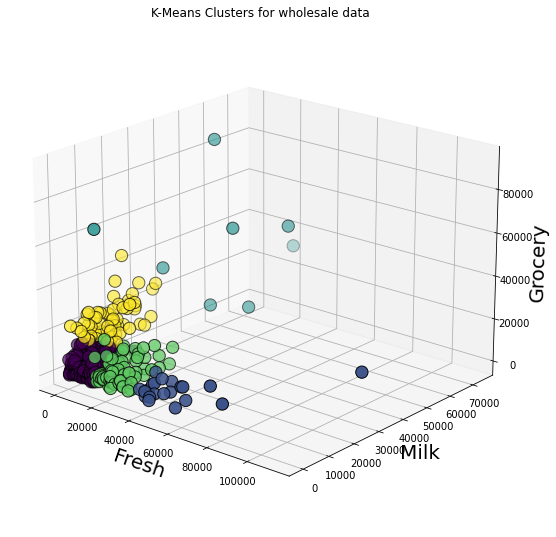

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df["Fresh"],df["Milk"],df["Grocery"],c=df['cluster'].astype('category'),cmap = "viridis",edgecolor="k", s=150)
ax1.view_init(20, -50)
ax1.set_xlabel("Fresh", fontsize=20)
ax1.set_ylabel("Milk", fontsize=20)
ax1.set_zlabel("Grocery", fontsize=20)
ax1.set_title("K-Means Clusters for wholesale data", fontsize=12)


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(X,labels)

0.42739710804743086

silhouette score is non negative closer to 1 ,so effective number of  cluster